In [1]:
from pylab import *
import pandas as pd
from energydiagram import ED
from matplotlib.gridspec import GridSpec
import os, sys
sys.path.append(os.path.abspath('../function_files/'))
from energy_dia import build_diagram, fig_settings

In [2]:
labels = array(['Pt100', 'Pt110', 'Pt111', 'Ru0001'])
# marker colors
colors = ['C2', 'lightcoral', 'C0', 'C3']
# marker face color
mfc = ['C2', 'lightcoral', 'C0', 'white']
# marker shape
markers = ['v', '^', 'o', 'o']

# Reference Point

In [3]:
# set G ref
# collect surface energies
surf_files = ['Pt100/platinum', 'Pt110/platinum',
              'Pt111/platinum', 'Ru0001/ruthenium']
surf_es = []
for i,s in enumerate(surf_files):
    data = pd.read_csv(f'../data/DFT_Es/surface/{s}_energy.csv')
    data.set_index('metric', inplace=True)
    surf_es += [data.loc['Converged Energy / eV']['value']]

# import gas phase data
FFgas = pd.read_csv('../data/Free_Energies/FF_molecs_gas_Gsummary_20C.csv')
PPgas = pd.read_csv('../data/Free_Energies/4PP_molecs_gas_Gsummary_20C.csv')

# get gas phase G for FF, 4PP, and H2
G_FF = FFgas['G/eV'].iloc[0]
G_PP = PPgas['G/eV'].iloc[0]
G_H2 = FFgas['G/eV'].iloc[-1]

# G_ref_FF = G_FF(g) + 3G_H2(g) + E_surf
G_ref_FF = surf_es + 3*G_H2 + G_FF
# G_ref_PP = G_PP(g) + 4G_H2(g) + E_surf
G_ref_PP = surf_es + 4*G_H2 + G_PP

# Import and organize FF data

In [4]:
# FF pathway data
# compile Gi - Gref
# Gi = G(i) + nH2*G_H2(g) - Gref
# nH2 is the number of gas phase H2 molecules to add

nH2 = array([3, 2.5, 2, 1.5, 1, 0.5, 0])
FF_Gs = []

for i,s in enumerate(labels):
    data = pd.read_csv(f'../data/Free_Energies/FFmolecs_{s}_Gsummary_20C.csv')
    # gather all ads state Gs
    Gi = array(data['G/eV'].iloc[:7])
    # surface energy
    Es = surf_es[i]
    # desorption of THFA
    THFAg = FFgas['G/eV'].iloc[2]
    # calculate Delta G
    # add a zero at the beginning of the array to represent ref state
    dG = append([0], Gi + nH2*G_H2 - G_ref_FF[i])
    dG = append(dG, [THFAg + Es - G_ref_FF[i]])
    FF_Gs += [dG] 

In [5]:
FF_simple_states = ['ref', 'FF*','(FF+H)*','FA*',
                      '(FA+H)*','(FA+2H)*','(FA+3H)*','THFA*','THFA(g)']

# Import and organize 4PP data

In [6]:
# 4PP pathway data
# compile Gi - Gref
# Gi = G(i) + nH2*G_H2(g) - Gref
# nH2 is the number of gas phase H2 molecules to add
PP_Gs = []

# 4PP to 4PCOL
nH2 = array([4, 3.5, 3, 2.5, 2, 1.5, 1])
for i,s in enumerate(labels[:-1]):
    data = pd.read_csv(f'../data/Free_Energies/4PPmolecs_{s}_Gsummary_20C.csv')
    # gather all ads state Gs
    Gi = array(data['G/eV'].iloc[:7])
    # surface energy
    Es = surf_es[i]
    # desorption of 4PCOL
    PCOLg = PPgas['G/eV'].iloc[1]
    # calculate Delta G
    # add a zero at the beginning of the array to represent ref state
    dG = append([0], Gi + nH2*G_H2 - G_ref_PP[i])
    dG = append(dG, [PCOLg + Es + G_H2 - G_ref_PP[i]])
    PP_Gs += [dG] 

# 4PP to PC
nH2 = array([4, 3.5, 3, 2.5, 2, 1.5, 0])
data_ru = pd.read_csv(f'../data/Free_Energies/4PPmolecs_Ru0001_Gsummary_20C.csv')
# gather all ads state Gs
Gi = array(data_ru['G/eV'].iloc[:7])
# surface energy
Es = surf_es[-1]
# desorption of PC
PCg = PPgas['G/eV'].iloc[2]
# OH and H component of PC on surface
OHH = data_ru['G/eV'].iloc[6] - data_ru['G/eV'].iloc[9]
OH = OHH - data_ru['G/eV'].iloc[7]
# calculate Delta G
# add a zero at the beginning of the array to represent ref state
dG = append([0], Gi + nH2*G_H2 - G_ref_PP[-1])
dG = append(dG, [PCg + 2*Es + OH + 0.5*G_H2 - G_ref_PP[-1]])
PP_Gs += [dG]

In [7]:
PP_simple_states = ['ref', '4-PP*', '(4-PP+H)*', '(4-PP+2H)*',
                   '(4-PP+3H)*', '(4-PP+4H)*', '(4-PP+5H)*','4-PCOL*',
                   '4-PCOL(g)']
PP_ru_states = ['ref', '4-PP*', '(PB+H)*', '(PB+2H)*',
                   '(PB+3H)*', '(PB+4H)*', '(PB+5H)*',
                   'PC*','PC(g)']

# Plot Free Energy Diagrams

In [8]:
FFxs = linspace(0.08, 0.9, 9)
PPxs = [linspace(0.07, 0.9, 9), linspace(0.08, 0.9, 9)]

FFys = array([0.7, 0.28, 0.08, 0.28, 0.08, 0.05, 0.05, 0.15,0.4])
PPys = array([0.7, 0.45, 0.45, 0.4, 0.35, 0.3, 0.3, 0.25, 0.35])
PP_ru_ys = array([0.7, 0.35, 0.2, 0.15, 0.15, 0.1, 0.05, 0.05,0.45])

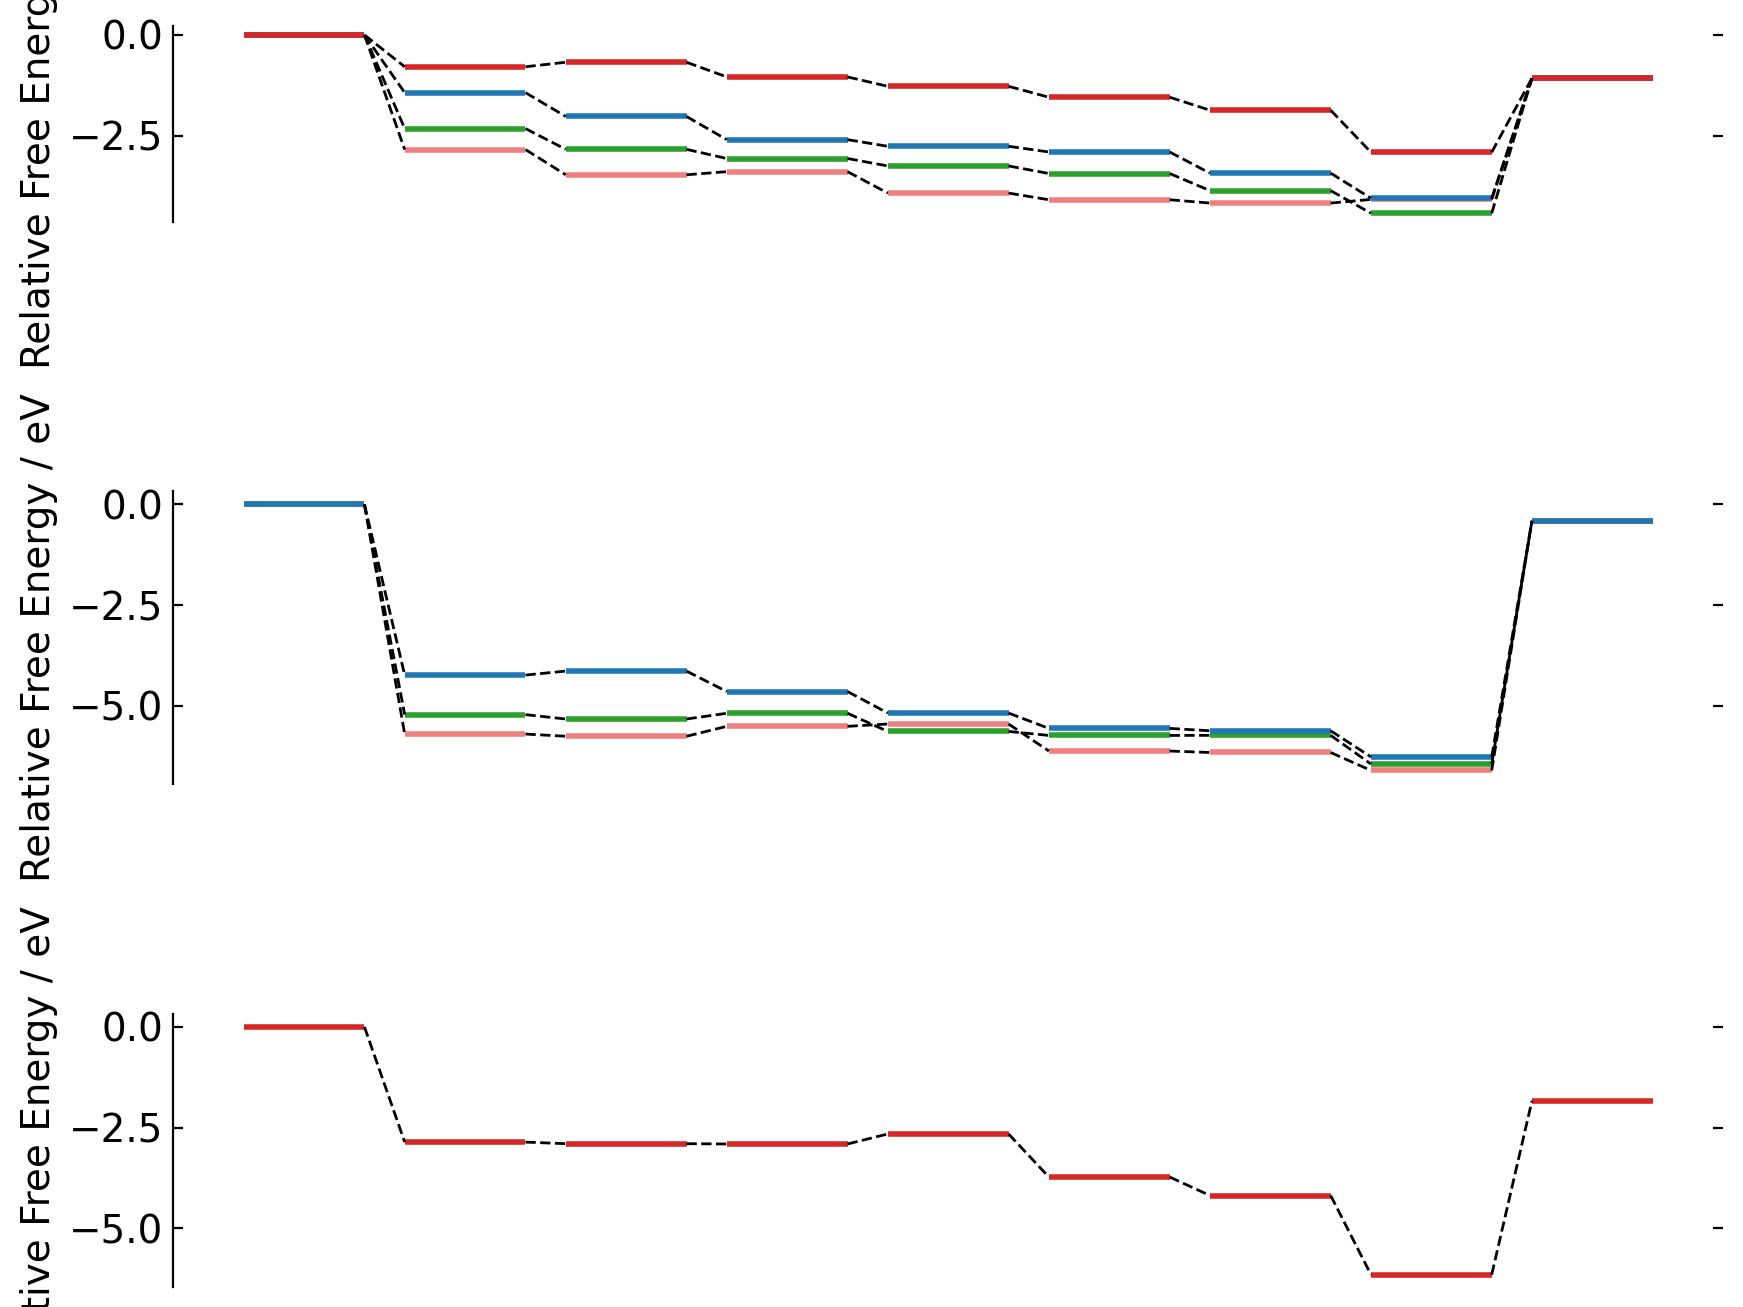

In [9]:
fig = figure(figsize=(10,10))

gs = GridSpec(3, 1, height_ratios=[1,1,1], width_ratios=[1], hspace=0)
FFax = fig.add_subplot(gs[0])
PPax = fig.add_subplot(gs[1])
PPax_ru = fig.add_subplot(gs[2])

FFdia = build_diagram(FF_Gs, FF_simple_states, colors, FFax)
PPdia = build_diagram(PP_Gs[:-1], PP_simple_states, colors[:-1], PPax)
PPrudia = build_diagram([PP_Gs[-1]], PP_ru_states, ['C3'], PPax_ru)

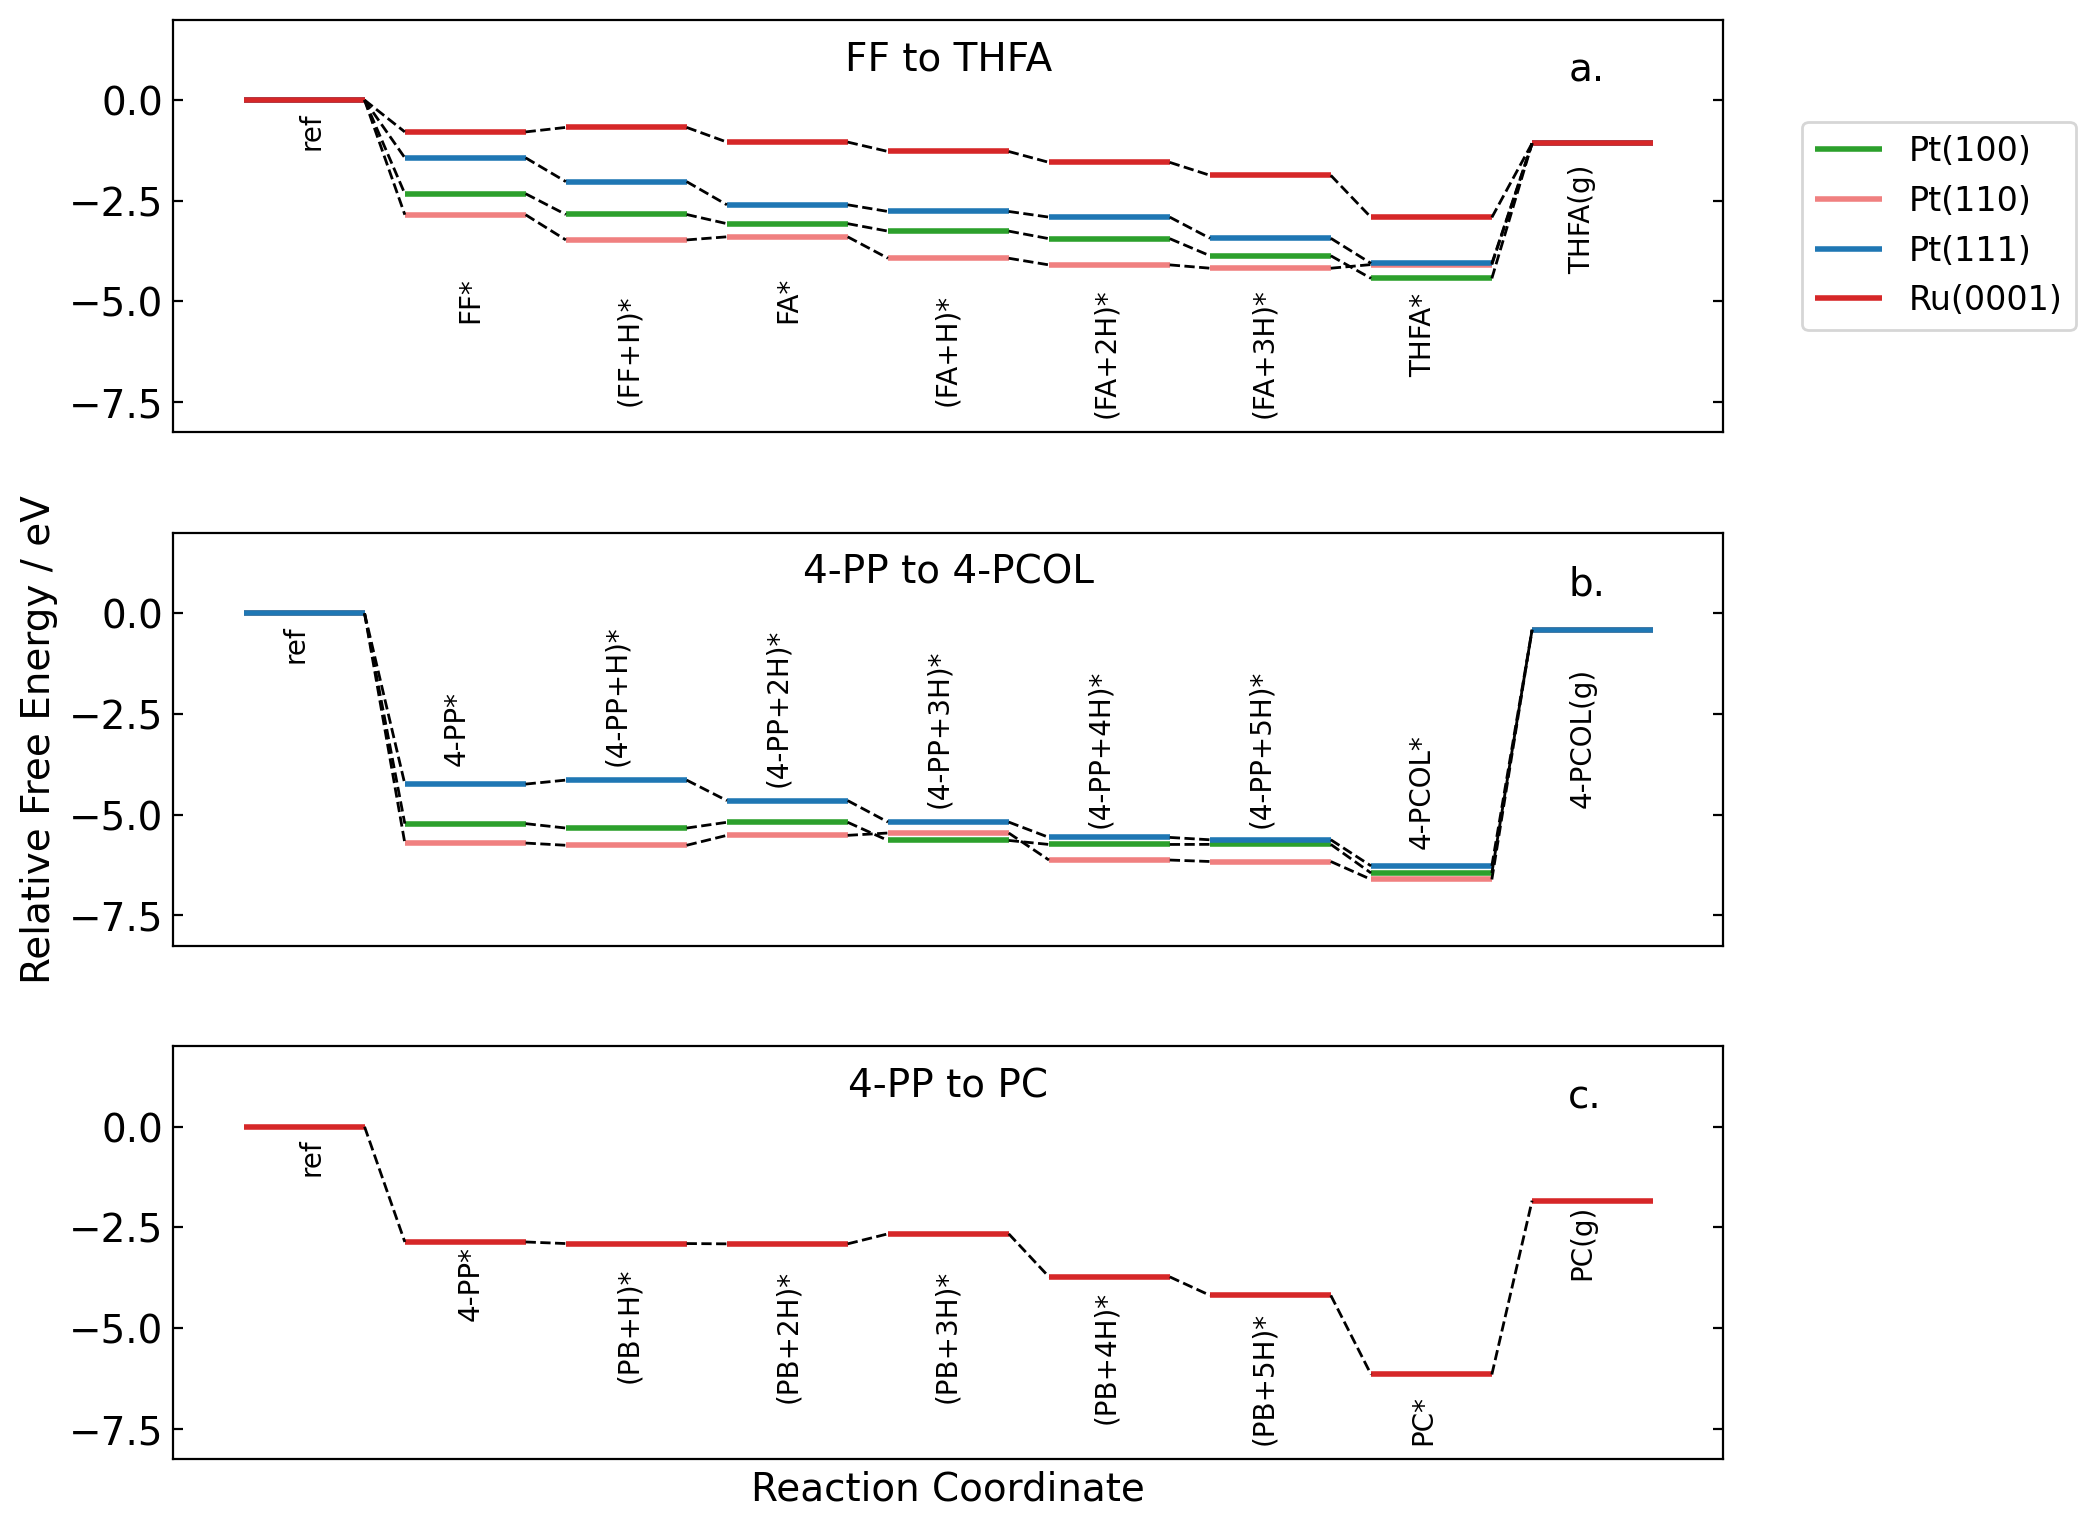

<Figure size 600x450 with 0 Axes>

In [10]:
upper = 2
lower = -8.25
fnt = 10
fig_settings(FFdia, (lower,upper), labels, 'FF to THFA', FF_simple_states, fnt, FFxs, FFys)
fig_settings(PPdia, (lower,upper), labels, '4-PP to 4-PCOL', PP_simple_states, fnt, PPxs[0], PPys)
fig_settings(PPrudia, (lower,upper), labels, '4-PP to PC', PP_ru_states, fnt, PPxs[-1], PP_ru_ys)

FFdia.ax.set_xlabel(" ")
FFdia.ax.set_ylabel(" ")
FFdia.ax.text(0.9,0.85,'a.',transform=FFdia.ax.transAxes)
PPdia.ax.set_xlabel(" ")
PPdia.ax.text(0.9,0.85,'b.',transform=PPdia.ax.transAxes)
PPrudia.ax.set_ylabel(" ")
PPrudia.ax.text(0.9,0.85,'c.',transform=PPrudia.ax.transAxes)
FFdia.ax.legend(['Pt(100)', 'Pt(110)', 'Pt(111)', 'Ru(0001)'], bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize = 12)

tight_layout()
fig